# Qube スプリアス測定結果

- 測定期間：2022/4/5~7
- 測定者：根来，伊藤，塩見

いくつかの筐体のボート毎に異なるLO周波数で測定したRFスペクトルをプロットした．横軸はRF，縦軸は出力電力に対応するが，IF周波数を1800~3200MHzまで50MHz毎に変えて測定したものを縦方向にオフセットしてプロットした．斜めにみえる線が所望波あるいはスプリアスである．IFのスキャンによりスプリアスのでる場所が変化していることがわかる．

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import instruments
import importlib
importlib.reload(instruments)
from instruments import MS2038_SPA
import scipy.signal

class Marker(object):
    @classmethod
    def find_peaks(cls, ary):
        x, y = ary[0], ary[1]
        i = scipy.signal.find_peaks(y)[0]
        j = np.argsort(y[i])
        return np.array([x[i][j], y[i][j]])
    
def extract_keys(o, label):
    return sorted(set([o[label] for o in data]),key=[o[label] for o in data].index)

def convert_plottable(o):
    lolist = extract_keys(o, 'LO')
    iflists = []
    tracelists = []
    for i in lolist:
        p = [j for j in o if j['LO'] == i]
        iflists.append(extract_keys(p, 'IF'))
        tracelist = []
        for q in p:
            tracelist.append(MS2038_SPA.new_array_freq_trace_pair(q, old_format=True))
        tracelists.append(tracelist)
    return {
        'TRACE': np.array(tracelists),
        'IF': np.array(iflists),
        'LO': np.array(lolist),
    }

QuBE Riken #1-4 Port 5


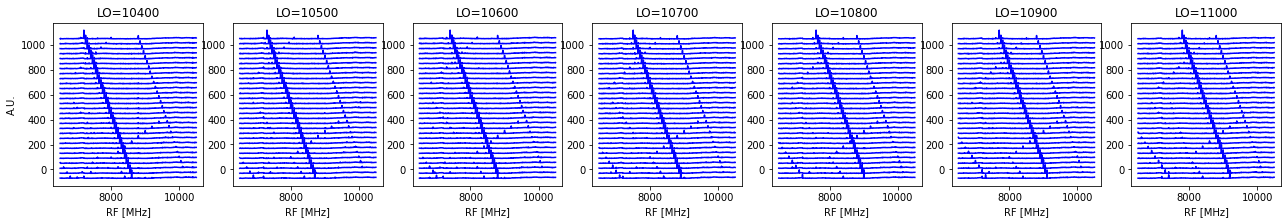

QuBE Riken #1-4 Port 6


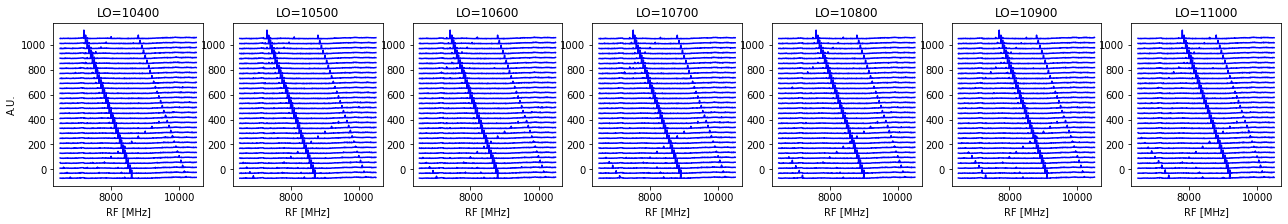

QuBE Riken #1-5 Port 5 VATT = 0xA00


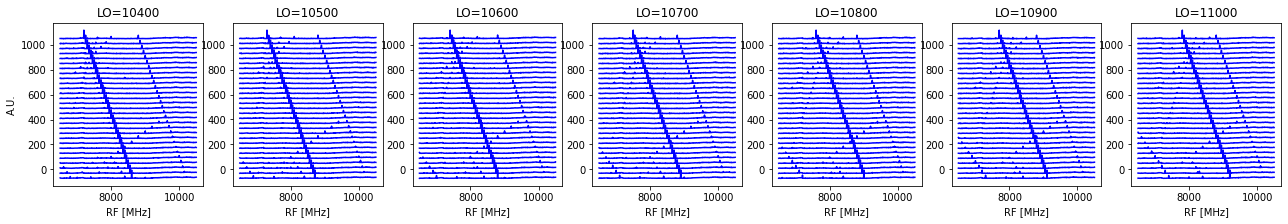

QuBE Riken #1-5 Port 6 VATT = 0xA00


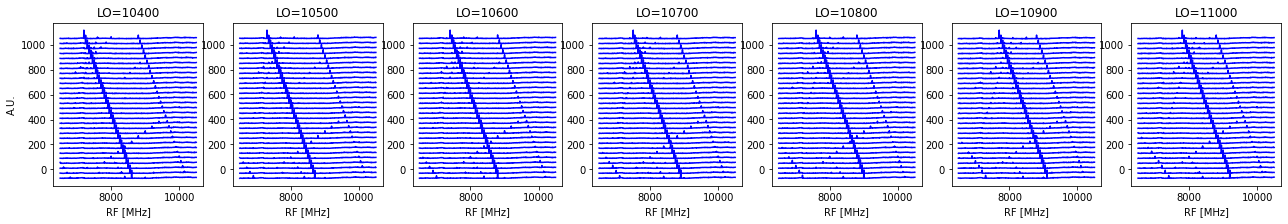

QuBE Riken #1-5 Port 7 VATT = 0xA00


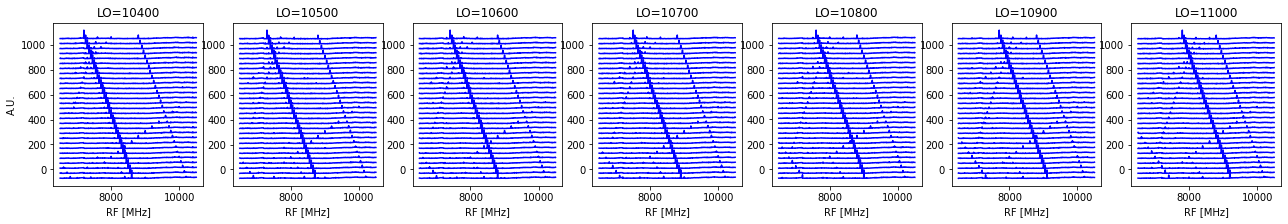

QuBE Riken #1-5 Port 8 VATT = 0xA00


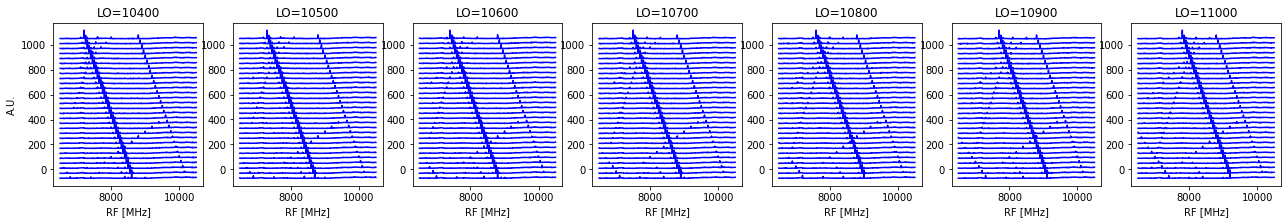

QuBE Riken #1-7 Port 5 VATT = 0xA00


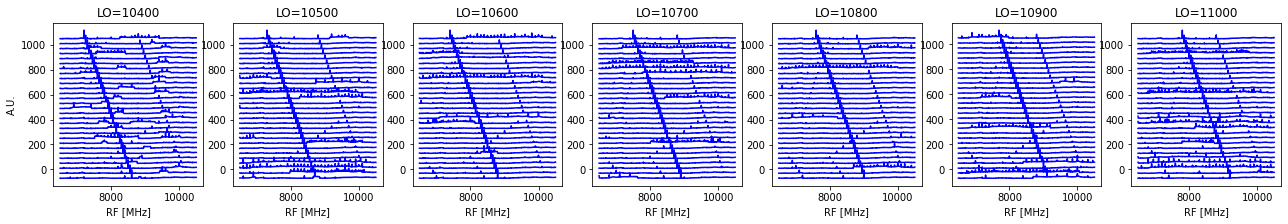

QuBE Riken #1-7 Port 6 VATT = 0xA00


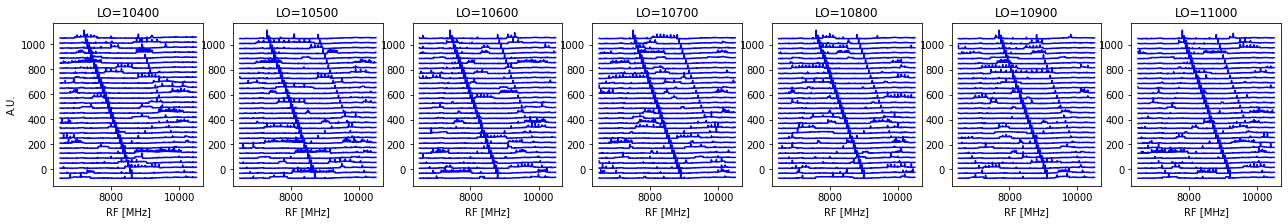

QuBE Riken #1-7 Port 7 VATT = 0xA00


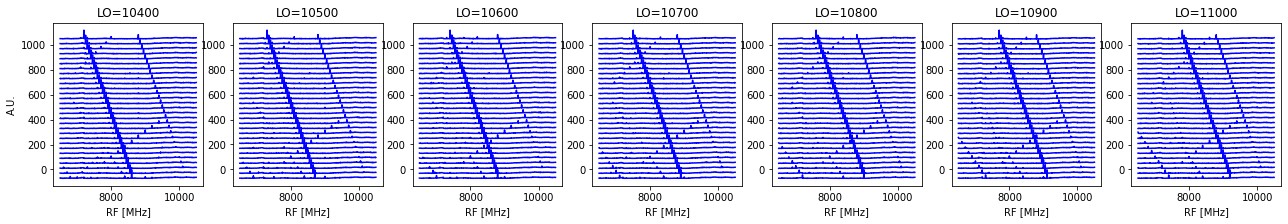

QuBE Riken #1-9 Port 7 VATT = 0xC00


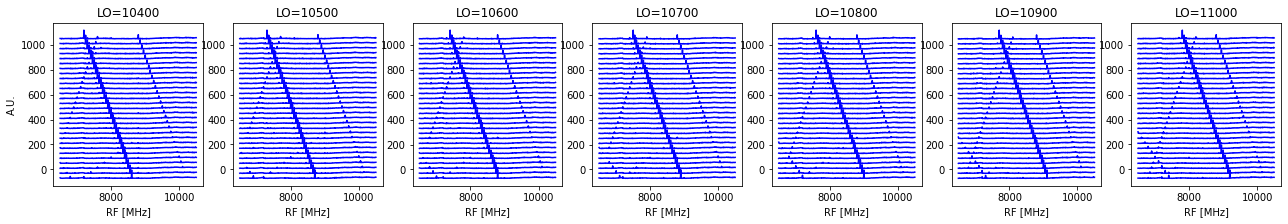

In [2]:
def plot_spurious(data):
    fig = plt.figure(figsize=(22,3))
    c = convert_plottable(data)
    ncol = len(c['LO'])
    axs = [fig.add_subplot(1,ncol,i+1) for i in range(ncol)]
    for j, fl, ax in zip(list(range(ncol)), c['LO'], axs):
        for i, fi in enumerate(c['IF'][j,:]):
            ax.plot(c['TRACE'][j,i,0,:], c['TRACE'][j,i,1,:] + i * 40, 'b')
            ax.set_title('LO={}'.format(fl))
            ax.set_xlabel('RF [MHz]')
    return axs

print('QuBE Riken #1-4 Port 5')
with open('../QuBE_Char/e7awg_sw/QubeRiken14_Port5.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-4 Port 6')
with open('../QuBE_Char/e7awg_sw/QubeRiken14_Port6.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

# print('QuBE Riken #1-4 Port 7')
# with open('../QuBE_Char/e7awg_sw/QubeRiken14_Port7.pickle', 'rb') as f:
#     data = pickle.load(f)
# axs = plot_spurious(data)
# axs[0].set_ylabel('A.U.')
# plt.show()

print('QuBE Riken #1-5 Port 5 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken15_Port5.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-5 Port 6 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken15_Port6.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-5 Port 7 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken15_Port7.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-5 Port 8 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken15_Port8.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-7 Port 5 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken17_Port5.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-7 Port 6 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken17_Port6.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-7 Port 7 VATT = 0xA00')
with open('../QuBE_Char/e7awg_sw/QubeRiken17_Port7.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')
plt.show()

print('QuBE Riken #1-9 Port 7 VATT = 0xC00')
with open('../QuBE_Char/e7awg_sw/QubeRiken1_9_Port7_0xc00.pickle', 'rb') as f:
    data = pickle.load(f)
axs = plot_spurious(data)
axs[0].set_ylabel('A.U.')

plt.show()

# print('QuBE Riken #1-5 Port 5 VATT = 0xC00')
# with open('../QuBE_Char/e7awg_sw/QubeRiken1_5_Port5_0xc00_coarse.pickle', 'rb') as f:
#     data = pickle.load(f)
# axs = plot_spurious(data)
# axs[0].set_ylabel('A.U.')
# plt.show()